In [1]:
import os 
import numpy as np

data_path=r'dataset' #path for dataset

categories=os.listdir(data_path) #category types in the dataset
print(categories)
labels=np.arange(len(categories))
print(labels)
label_dict=dict(zip(categories,labels))
print(label_dict)

['non-vehicles', 'vehicles']
[0 1]
{'non-vehicles': 0, 'vehicles': 1}


In [2]:
import cv2

img_size=64 #img size 100,100

data=[]
target=[]

for category in categories:
    
    imgs_path=os.path.join(data_path,category)
    img_names=os.listdir(imgs_path)
    #print(img_names)
    
    for img_name in img_names: #apply preprocessing to data in dataset
        
        img_path=os.path.join(imgs_path,img_name)
        #print(img_path)
        try:
            img=cv2.imread(img_path)
            img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #convert img
            img=cv2.resize(img,(img_size,img_size))
            data.append(img)
            target.append(label_dict[category])
        except Exception as e:
            print(img_path,e)

In [3]:
data_new=np.array(data)
target_new=np.array(target)

In [4]:
print(data_new.shape)
print(target_new.shape)

(55756, 64, 64)
(55756,)


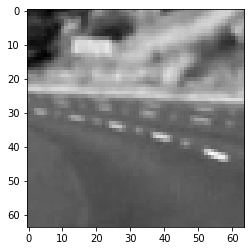

In [5]:
from matplotlib import pyplot as plt

plt.imshow(data[45],cmap='gray')

In [6]:
target_new[45]

0

In [7]:
print(data_new.shape)
print(data_new.shape[0],data_new.shape[1],data_new.shape[2])

(55756, 64, 64)
55756 64 64


In [8]:
data_new=data_new.reshape(data_new.shape[0],data_new.shape[1],data_new.shape[2],1) # converting to 4D, CNN needs 4D input
print(data_new.shape)

(55756, 64, 64, 1)


In [9]:
data_new=data_new/255 #normalizing and Scaling

from keras.utils import np_utils

target_new=np_utils.to_categorical(target_new)

In [10]:
np.save('data',data_new) #save train_data
np.save('target',target_new)#save train_target

In [11]:
data=np.load('data.npy')  #load train_data
target=np.load('target.npy')#load train_target

In [12]:
print(data.shape)
print(target.shape)

(55756, 64, 64, 1)
(55756, 2)


In [13]:
print(data.shape[1:])

(64, 64, 1)


In [14]:
#apply basic layers
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Activation

model=Sequential()

model.add(Conv2D(64,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(5,5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(16,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(50,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        640       
                                                                 
 activation (Activation)     (None, 62, 62, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 32)        51232     
                                                                 
 activation_1 (Activation)   (None, 27, 27, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                    

In [15]:
history = model.fit(data,target,epochs=20,validation_split=0.2,batch_size=32) #traniing

Epoch 1/20
1394/1394 [==============================] - 217s 154ms/step - loss: 0.2921 - accuracy: 0.8753 - val_loss: 0.4752 - val_accuracy: 0.8054
Epoch 2/20
1394/1394 [==============================] - 219s 157ms/step - loss: 0.1551 - accuracy: 0.9376 - val_loss: 0.1861 - val_accuracy: 0.9240
Epoch 3/20
1394/1394 [==============================] - 225s 161ms/step - loss: 0.1055 - accuracy: 0.9598 - val_loss: 0.1077 - val_accuracy: 0.9597
Epoch 4/20
1394/1394 [==============================] - 229s 164ms/step - loss: 0.0861 - accuracy: 0.9676 - val_loss: 0.0858 - val_accuracy: 0.9702
Epoch 5/20
1394/1394 [==============================] - 211s 151ms/step - loss: 0.0699 - accuracy: 0.9747 - val_loss: 0.0802 - val_accuracy: 0.9669
Epoch 6/20
1394/1394 [==============================] - 221s 159ms/step - loss: 0.0617 - accuracy: 0.9763 - val_loss: 0.1011 - val_accuracy: 0.9624
Epoch 7/20
1394/1394 [==============================] - 205s 147ms/step - loss: 0.0528 - accuracy: 0.9803 - val_

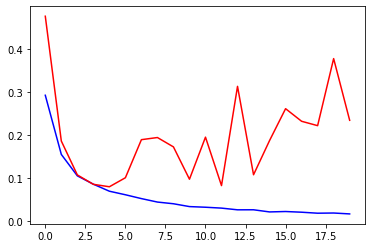

In [17]:
from matplotlib import pyplot as plt

plt.plot(model.history.history['loss'],'b')
plt.plot(model.history.history['val_loss'],'r')

In [19]:
model.save_weights(r'TEST_first.h5')

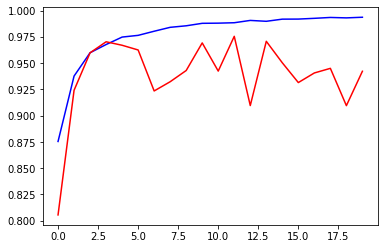

In [20]:
plt.plot(model.history.history['accuracy'],'b')
plt.plot(model.history.history['val_accuracy'],'r')